In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

import cv2
import glob
import shutil
from collections import Counter

from keras.callbacks import Callback
from keras.backend import clear_session

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

import os
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

print('TensorFlow version', tf.__version__)

Using TensorFlow backend.


TensorFlow version 2.3.1


In [2]:
# Set up path

base_dir = os.path.join(os.getcwd(), 'dataset')
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [3]:
folder_list = [x[0] for x in os.walk(base_dir)]
folder_list

['C:\\Users\\user\\Food_Classification\\dataset',
 'C:\\Users\\user\\Food_Classification\\dataset\\cheesecake',
 'C:\\Users\\user\\Food_Classification\\dataset\\chicken_curry',
 'C:\\Users\\user\\Food_Classification\\dataset\\chocolate_ice_cream',
 'C:\\Users\\user\\Food_Classification\\dataset\\french_toast',
 'C:\\Users\\user\\Food_Classification\\dataset\\fried_rice',
 'C:\\Users\\user\\Food_Classification\\dataset\\macarons',
 'C:\\Users\\user\\Food_Classification\\dataset\\nachos',
 'C:\\Users\\user\\Food_Classification\\dataset\\spaghetti_bolognese',
 'C:\\Users\\user\\Food_Classification\\dataset\\sushi',
 'C:\\Users\\user\\Food_Classification\\dataset\\test',
 'C:\\Users\\user\\Food_Classification\\dataset\\train',
 'C:\\Users\\user\\Food_Classification\\dataset\\train\\cheesecake',
 'C:\\Users\\user\\Food_Classification\\dataset\\train\\chicken_curry',
 'C:\\Users\\user\\Food_Classification\\dataset\\train\\chocolate_ice_cream',
 'C:\\Users\\user\\Food_Classification\\dataset\

In [4]:
folder_name = []
for i in folder_list:
    folder_name.append(os.path.basename(os.path.normpath(i)))
folder_name

['dataset',
 'cheesecake',
 'chicken_curry',
 'chocolate_ice_cream',
 'french_toast',
 'fried_rice',
 'macarons',
 'nachos',
 'spaghetti_bolognese',
 'sushi',
 'test',
 'train',
 'cheesecake',
 'chicken_curry',
 'chocolate_ice_cream',
 'french_toast',
 'fried_rice',
 'macarons',
 'nachos',
 'spaghetti_bolognese',
 'sushi',
 'waffles',
 'val',
 'cheesecake',
 'chicken_curry',
 'chocolate_ice_cream',
 'french_toast',
 'fried_rice',
 'macarons',
 'nachos',
 'spaghetti_bolognese',
 'sushi',
 'waffles',
 'waffles']

In [5]:
not_data_folder = ['dataset','test','train', 'val']
classes = list()

for word in folder_name:   #for each word in line.split()
    if word not in not_data_folder:    #if a word isn't in line.split            
        classes.append(word) 

classes

['cheesecake',
 'chicken_curry',
 'chocolate_ice_cream',
 'french_toast',
 'fried_rice',
 'macarons',
 'nachos',
 'spaghetti_bolognese',
 'sushi',
 'cheesecake',
 'chicken_curry',
 'chocolate_ice_cream',
 'french_toast',
 'fried_rice',
 'macarons',
 'nachos',
 'spaghetti_bolognese',
 'sushi',
 'waffles',
 'cheesecake',
 'chicken_curry',
 'chocolate_ice_cream',
 'french_toast',
 'fried_rice',
 'macarons',
 'nachos',
 'spaghetti_bolognese',
 'sushi',
 'waffles',
 'waffles']

In [6]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  num_train = int(round(len(images)*0.8))
  train, val = images[:num_train], images[num_train:]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.copy(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.copy(v, os.path.join(base_dir, 'val', cl))

cheesecake: 50 Images
chicken_curry: 50 Images
chocolate_ice_cream: 50 Images
french_toast: 50 Images
fried_rice: 48 Images
macarons: 50 Images
nachos: 50 Images
spaghetti_bolognese: 49 Images
sushi: 48 Images
cheesecake: 50 Images
chicken_curry: 50 Images
chocolate_ice_cream: 50 Images
french_toast: 50 Images
fried_rice: 48 Images
macarons: 50 Images
nachos: 50 Images
spaghetti_bolognese: 49 Images
sushi: 48 Images
waffles: 50 Images
cheesecake: 50 Images
chicken_curry: 50 Images
chocolate_ice_cream: 50 Images
french_toast: 50 Images
fried_rice: 48 Images
macarons: 50 Images
nachos: 50 Images
spaghetti_bolognese: 49 Images
sushi: 48 Images
waffles: 50 Images
waffles: 50 Images


In [7]:
batch_size = 10
IMG_SHAPE = 150

image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size, directory=train_dir, shuffle=True,target_size=(IMG_SHAPE,IMG_SHAPE))

Found 395 images belonging to 10 classes.


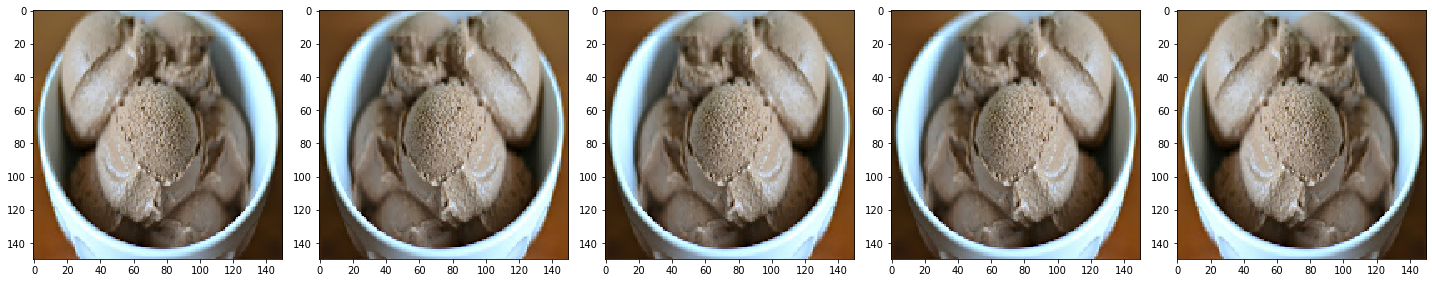

In [8]:
def plotImages(image_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip( image_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 395 images belonging to 10 classes.


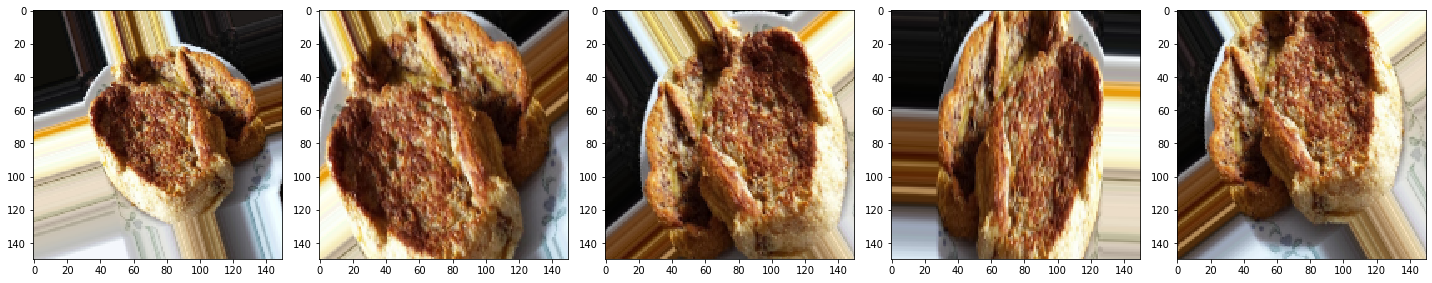

In [9]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [10]:
# validation data

image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 100 images belonging to 10 classes.


In [11]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [12]:
epochs=100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

Epoch 1/100
40/40 [==============================] - 13s 332ms/step - loss: 2.4083 - accuracy: 0.0886 - val_loss: 2.3000 - val_accuracy: 0.1400
Epoch 2/100
40/40 [==============================] - 14s 352ms/step - loss: 2.2987 - accuracy: 0.1266 - val_loss: 2.2744 - val_accuracy: 0.1800
Epoch 3/100
40/40 [==============================] - 14s 349ms/step - loss: 2.2262 - accuracy: 0.1418 - val_loss: 2.0984 - val_accuracy: 0.2000
Epoch 4/100
40/40 [==============================] - 14s 362ms/step - loss: 2.1455 - accuracy: 0.1722 - val_loss: 2.0787 - val_accuracy: 0.2000
Epoch 5/100
40/40 [==============================] - 13s 320ms/step - loss: 2.0904 - accuracy: 0.1924 - val_loss: 2.0068 - val_accuracy: 0.2800
Epoch 6/100
40/40 [==============================] - 13s 330ms/step - loss: 2.0203 - accuracy: 0.2127 - val_loss: 1.9736 - val_accuracy: 0.1900
Epoch 7/100
40/40 [==============================] - 14s 353ms/step - loss: 2.0057 - accuracy: 0.2456 - val_loss: 1.9722 - val_accuracy:

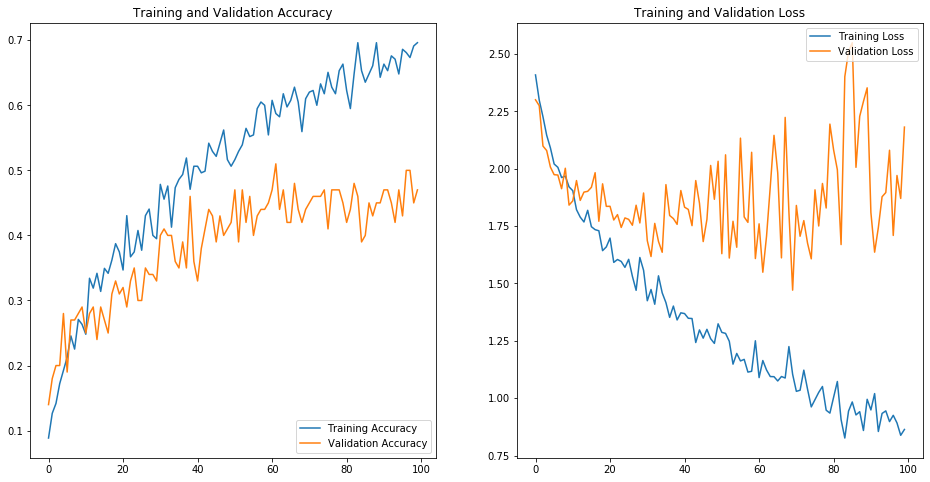

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
# read test data
import PIL
import PIL.Image
import pathlib

test_dir = pathlib.Path(test_dir)
image_count = len(list(test_dir.glob('*')))
print('Total test file: ',image_count)

Total test file:  20


In [15]:
def normalize(images):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images

test_image = list(test_dir.glob('*'))

test_array = []
y_pred = []

for test_url in test_image:
    test_img = tf.keras.preprocessing.image.load_img(test_url, target_size=(IMG_SHAPE,IMG_SHAPE))
    img_array = tf.keras.preprocessing.image.img_to_array(test_img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    norm_img_array = normalize(img_array)
    test_array.append(norm_img_array)
    pred = model.predict(norm_img_array)
    print('Prediction :', np.argmax(pred))
    y_pred.append(np.argmax(pred))
    score = tf.nn.softmax(pred[0])

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence score."
        .format(classes[np.argmax(pred)], 100 * np.max(score))
    )
#     print('The actual file name is ', os.path.basename(os.path.normpath(test_url)))

Prediction : 7
This image most likely belongs to spaghetti_bolognese with a 18.64 percent confidence score.
Prediction : 0
This image most likely belongs to cheesecake with a 16.33 percent confidence score.
Prediction : 3
This image most likely belongs to french_toast with a 13.25 percent confidence score.
Prediction : 9
This image most likely belongs to cheesecake with a 19.09 percent confidence score.
Prediction : 5
This image most likely belongs to macarons with a 13.10 percent confidence score.
Prediction : 5
This image most likely belongs to macarons with a 15.71 percent confidence score.
Prediction : 9
This image most likely belongs to cheesecake with a 20.93 percent confidence score.
Prediction : 9
This image most likely belongs to cheesecake with a 17.00 percent confidence score.
Prediction : 4
This image most likely belongs to fried_rice with a 22.67 percent confidence score.
Prediction : 4
This image most likely belongs to fried_rice with a 12.40 percent confidence score.
Pre

In [16]:
y_pred

[7, 0, 3, 9, 5, 5, 9, 9, 4, 4, 5, 8, 6, 1, 6, 7, 8, 8, 9, 9]

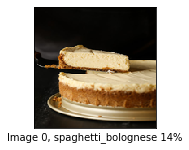

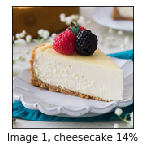

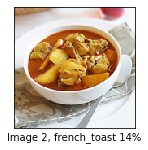

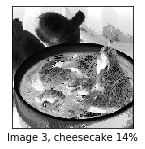

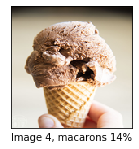

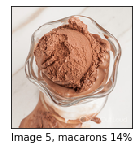

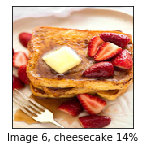

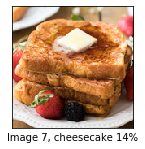

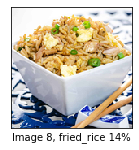

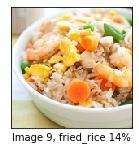

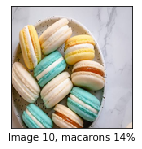

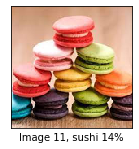

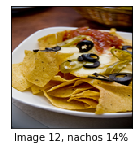

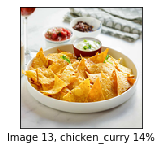

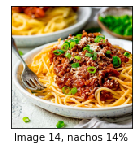

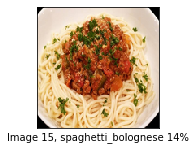

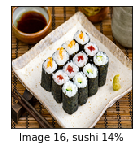

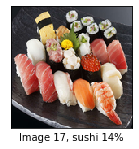

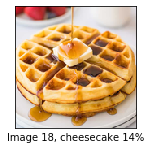

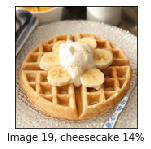

In [17]:
for i in range(len(test_image)):
    predictions_array, img = y_pred[i], test_image[i]

    img = PIL.Image.open(test_image[i])
    img = img.resize((IMG_SHAPE,IMG_SHAPE), PIL.Image.ANTIALIAS)
    
    num_rows = 5
    num_cols = 4
    
    plt.figure(figsize=(10, 20))
    plt.subplot(num_rows,num_cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = int(predictions_array)


    plt.xlabel("Image {}, {} {:2.0f}%".format(i, classes[predicted_label],100*np.max(score)))

In [20]:
from sklearn.metrics import f1_score

y_true = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9]

micro_f1_score = f1_score(y_true, y_pred, average='micro')
print('F1 score micro is ', micro_f1_score)
macro_f1_score = f1_score(y_true, y_pred, average='macro')
print('F1 score macro is ', macro_f1_score)
weighted_f1_score = f1_score(y_true, y_pred, average='weighted')
print('F1 score weighted is ', weighted_f1_score)

F1 score micro is  0.5
F1 score macro is  0.44380952380952376
F1 score weighted is  0.44380952380952376


In [21]:
print('Avg acc      :', np.mean(acc))
print('Avg val_acc  :', np.mean(val_acc))
print('Avg loss     :', np.mean(loss))
print('Avg val_loss :', np.mean(val_loss))

Avg acc      : 0.504303797185421
Avg val_acc  : 0.38739999890327453
Avg loss     : 1.3349109256267548
Avg val_loss : 1.8881585645675658
